# Import Libaray

In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(mice)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




# Dataset Overview

This dataset from the National Institute of Diabetes and Digestive and Kidney Diseases predicts diabetes in patients. It contains diagnostic measurements from Pima Indian women aged 21 or older, with 8 input features and one target variable.

## Data Summary

- **Source:** National Institute of Diabetes and Digestive and Kidney Diseases
- **Objective:** To predict whether a patient has diabetes based on diagnostic factors.
- **Population Constraints:**
  - Female patients only
  - Minimum age of 21
  - Pima Indian heritage
- **Number of Observations:** 768

## Variables

The dataset includes 8 potential input features and one target variable:

| Name                     | Type         | Description                                                                                     | Role   | Mean | Std. Deviation | Min | 25% | 50% | 75% | Max |
|--------------------------|--------------|-------------------------------------------------------------------------------------------------|--------|------|----------------|-----|-----|-----|-----|-----|
| **Outcome**              | Categorical  | 0: Non Diabetes,  1: Diabetes                                                                   | Target | 0.35 | 0.48           | 0   | 0   | 0   | 1   | 1   |
| **Pregnancies**          | Numerical    | Number of pregnancies                                                                           | Input  | 3.85 | 3.37           | 0   | 1   | 3   | 6   | 17  |
| **Glucose**              | Numerical    | Glucose level in blood                                                                          | Input  | 121  | 32             | 0   | 99  | 117 | 141 | 199 |
| **BloodPressure**        | Numerical    | Blood pressure measurement                                                                      | Input  | 69.1 | 19.3           | 0   | 62  | 72  | 80  | 122 |
| **SkinThickness**        | Numerical    | Thickness of the skin                                                                           | Input  | 20.5 | 15.9           | 0   | 0   | 23  | 32  | 99  |
| **Insulin**              | Numerical    | Insulin level in blood                                                                          | Input  | 79.8 | 115            | 0   | 0   | 32  | 128 | 846 |
| **BMI**                  | Numerical    | Body mass index                                                                                 | Input  | 32   | 7.88           | 0   | 27.3| 32  | 36.6| 67.1|
| **DiabetesPedigreeFunction** | Numerical | Diabetes percentage, representing a genetic predisposition to diabetes                         | Input  | 0.47 | 0.33           | 0.08| 0.24| 0.37| 0.63| 2.42 |
| **Age**                  | Numerical    | Age                                                                                             | Input  | 33.2 | 11.8           | 21  | 24  | 29  | 41  | 81  |

Some of the numerical features have a minimum value of **"0"**, which maybe consider as **missing values** or **non-measurements**.

## Question: 
Can we predict whether a female patient of Pima Indian heritage has diabetes based on diagnostic measurements such as glucose levels, blood pressure, BMI, age, and other health-related factors?

## Explanation:
The response variable of interest is the `Outcome` (indicating diabetes status, where 1 = diabetes and 0 = no diabetes). The explanatory variables include `Glucose`, `BloodPressure`, `BMI`, `Age`, `Pregnancies`, `SkinThickness`, `Insulin`, and `DiabetesPedigreeFunction`. These variables provide relevant health and genetic indicators that could be associated with diabetes risk.

The question is primarily focused on **prediction**. By building a predictive model, we aim to determine whether a patient has diabetes based on these diagnostic measurements. This dataset will support the question by providing a labeled set of health measurements that can be used to train and test various predictive models, ultimately allowing us to assess model accuracy and feature importance for diabetes prediction.

# EDA

In [2]:
diabetes_data <- read.csv("data/diabetes.csv")
head(diabetes_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


### Proposed Visualization: Overlapping Histograms by Diabetes Status

**Plot Type**: Overlapping histograms for each numerical variable, grouped by `Outcome` (diabetes status).

**Description**: A set of overlapping histograms for each numerical variable (e.g., `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`) grouped by `Outcome` (No Diabetes and Diabetes) with distinct colors.

Each histogram will:

- Display the distribution of values for both diabetic and non-diabetic groups within each variable.
- Use transparency to allow for overlap visualization, making it easier to compare distributions between groups.
- Highlight areas of overlap and separation between groups, indicating how well each variable differentiates between diabetic and non-diabetic patients.

**Reasoning**: Overlapping histograms are a powerful way to visualize the distribution of values across different outcome groups. This approach helps in identifying:

- **Separation of Distributions**: If distributions for diabetic and non-diabetic groups are well-separated, this suggests that the variable may be a strong predictor of diabetes status.
   
- **Skewness and Outliers**: Overlapping histograms reveal skewness and any unusual values, which can inform data preprocessing needs.

- **Comparative Shape of Distributions**: Seeing the shape of the distributions helps identify if data transformations are necessary for variables with strong skewness.

**Relevance to the Question**: This visualization allows us to explore which variables show clear distinctions between diabetic and non-diabetic groups, helping to identify potential predictors.


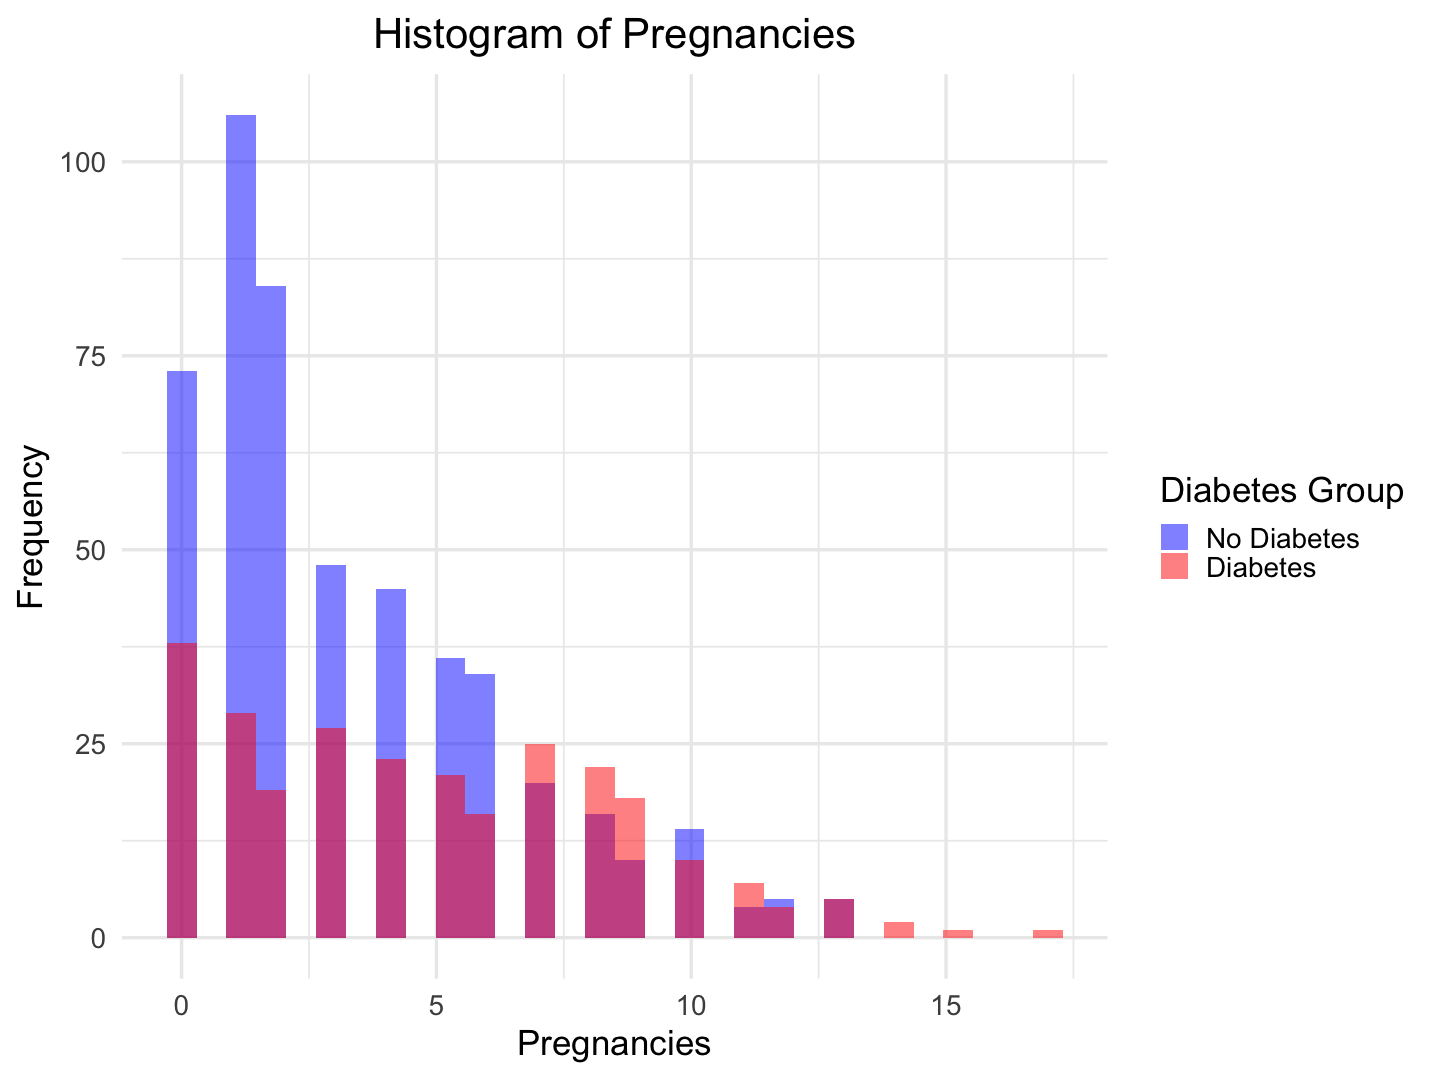

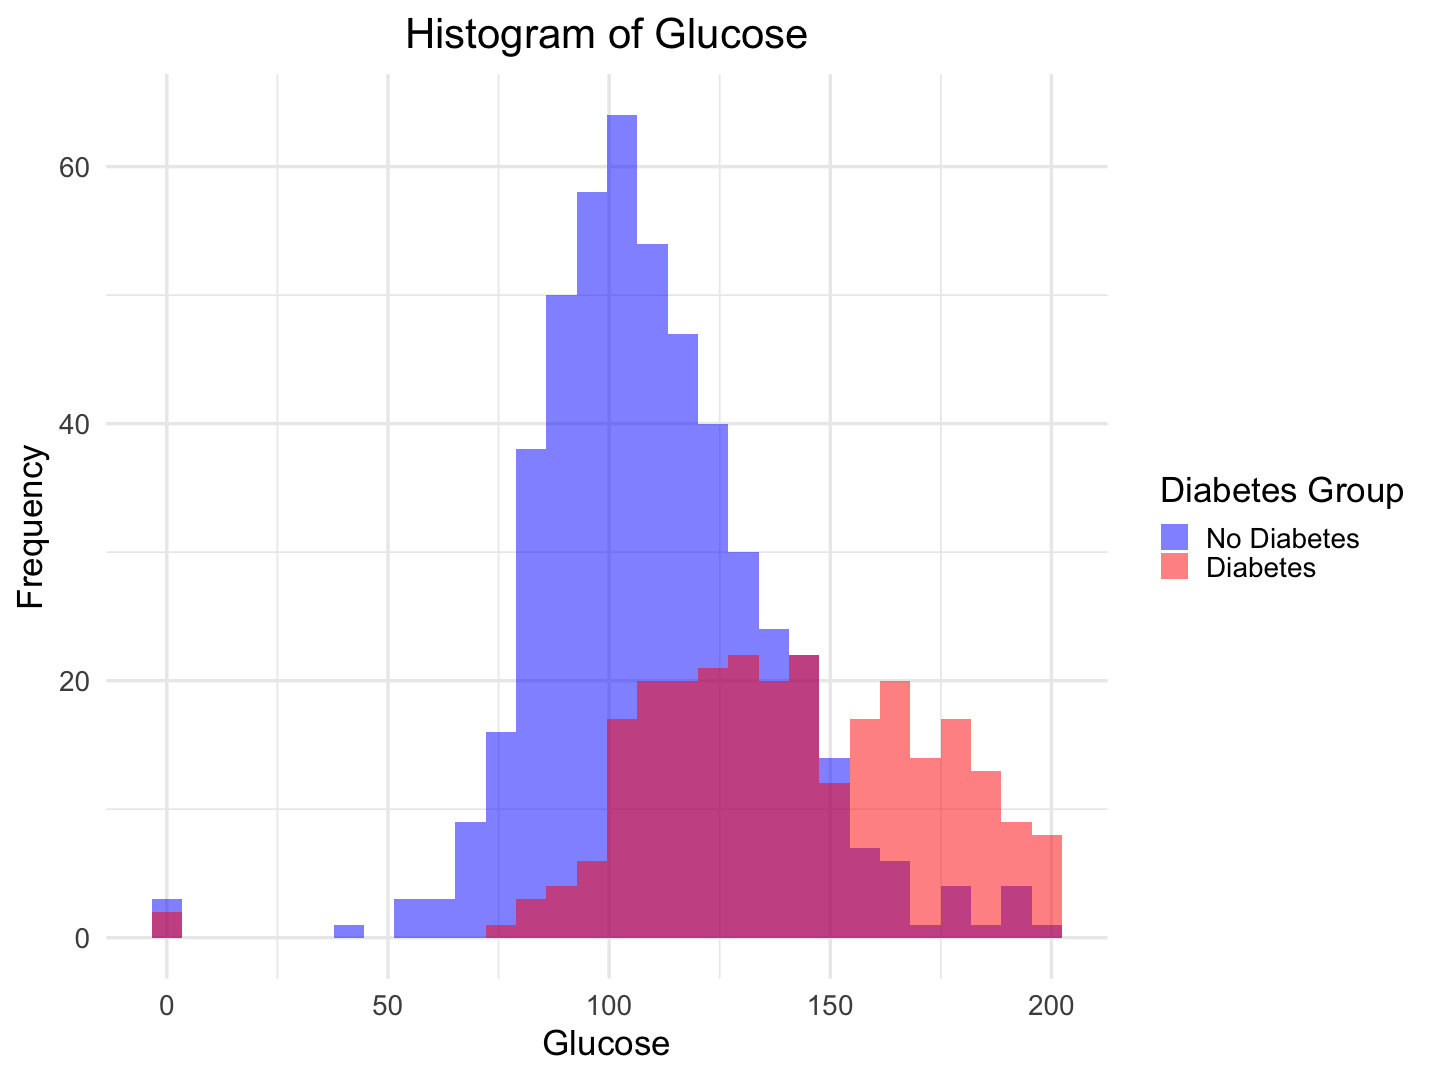

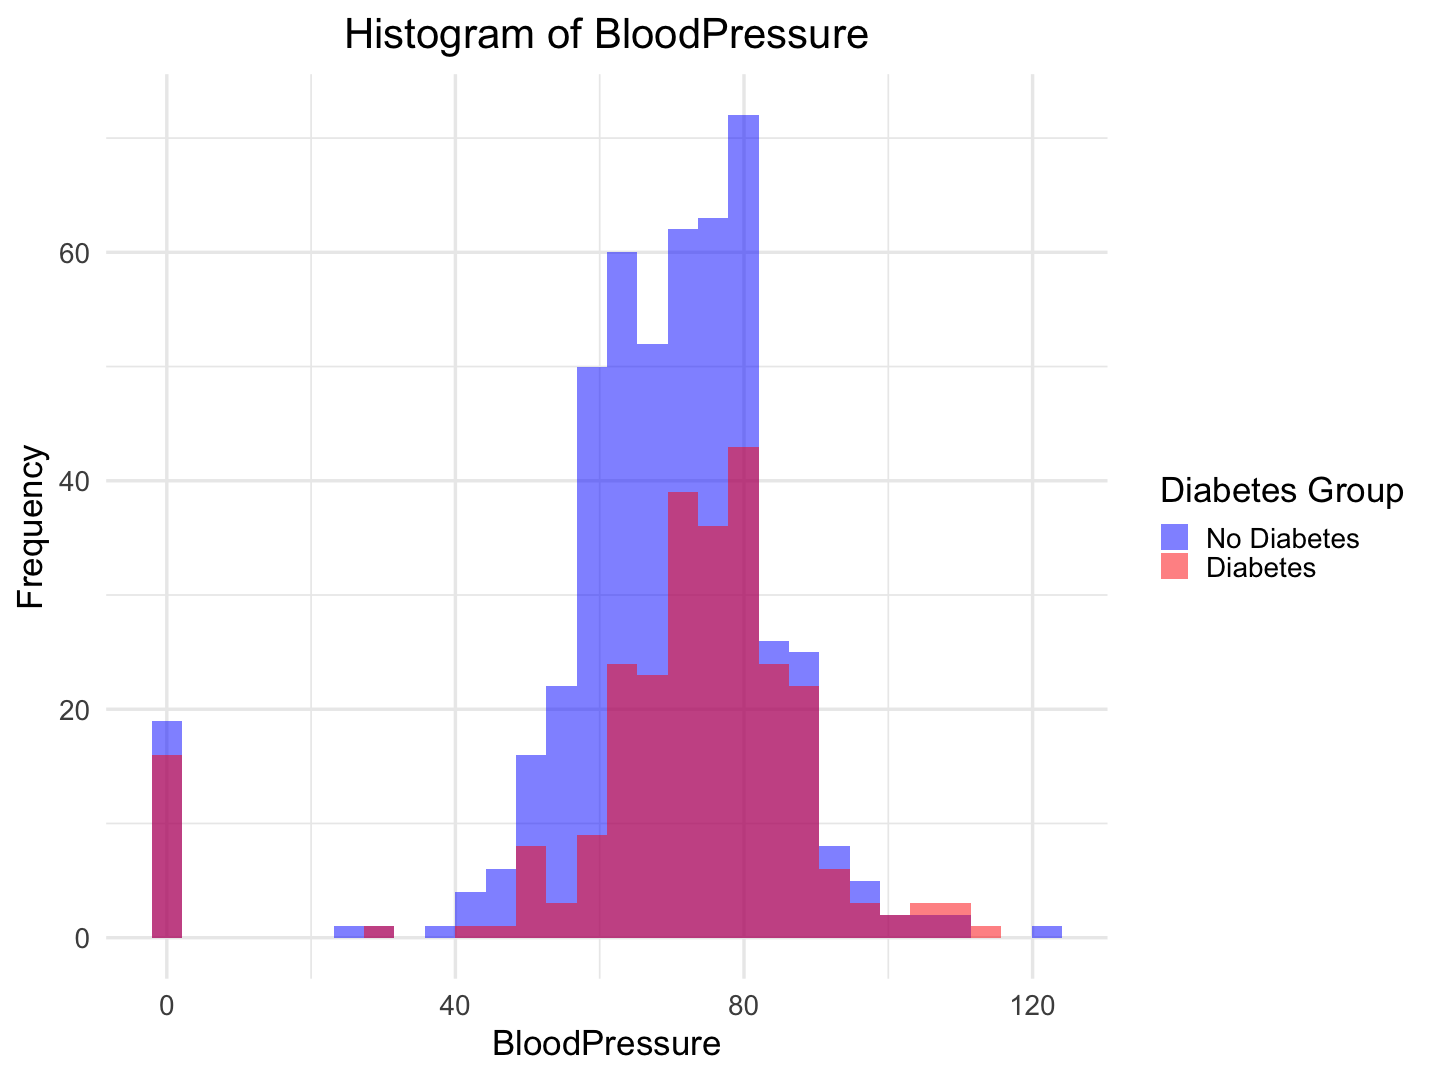

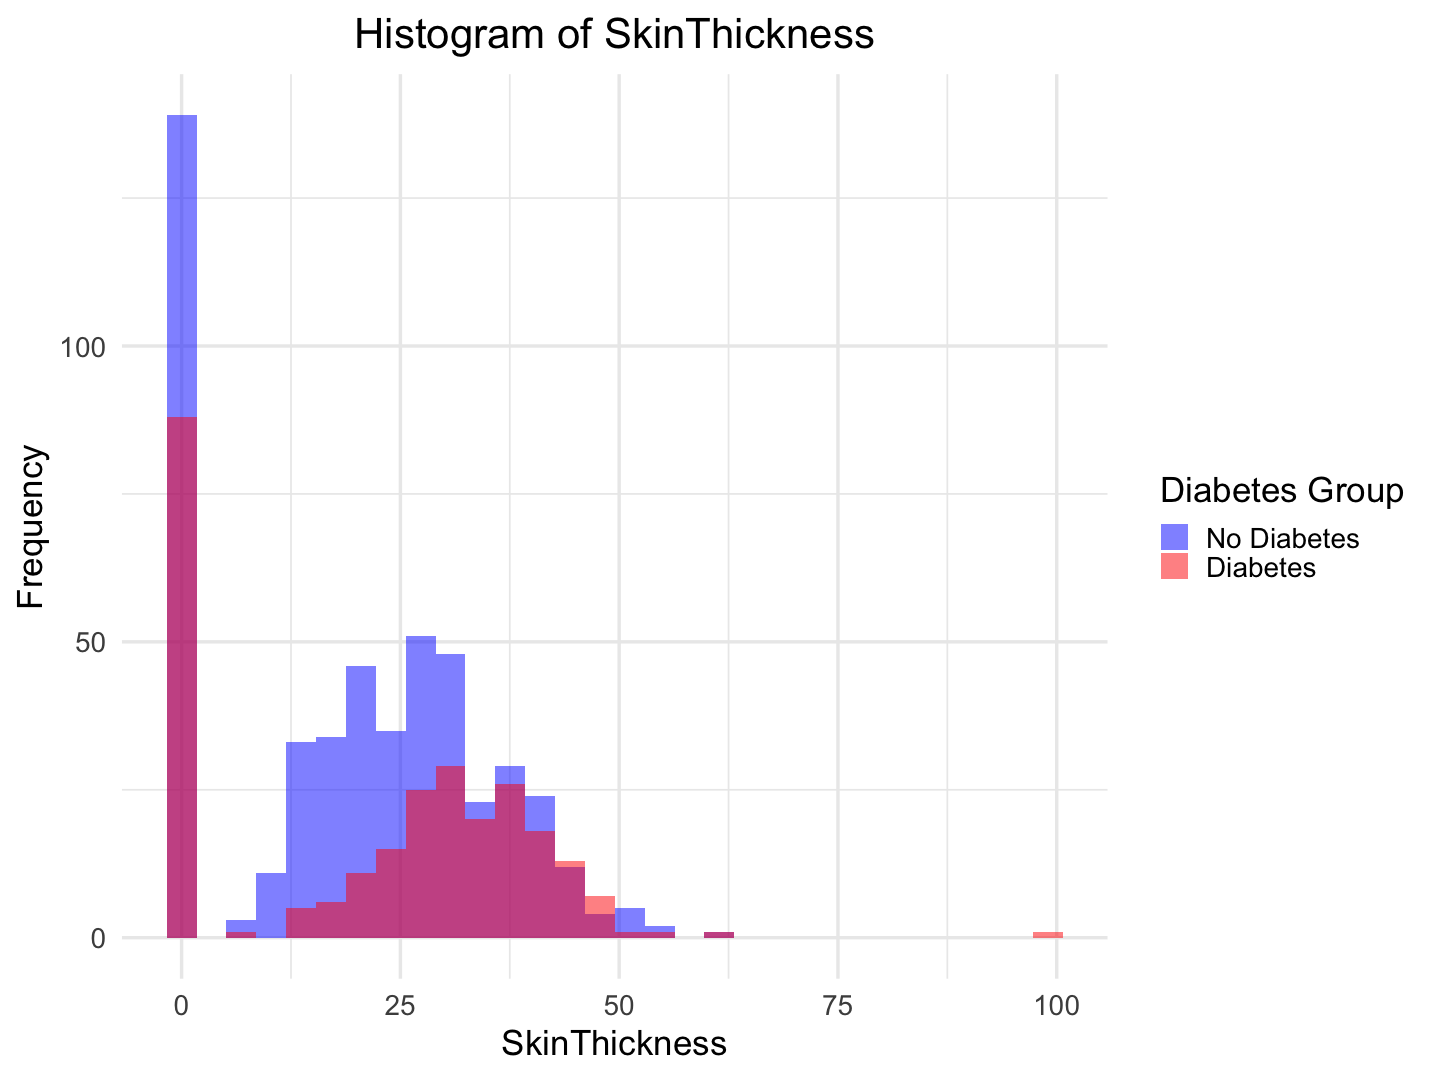

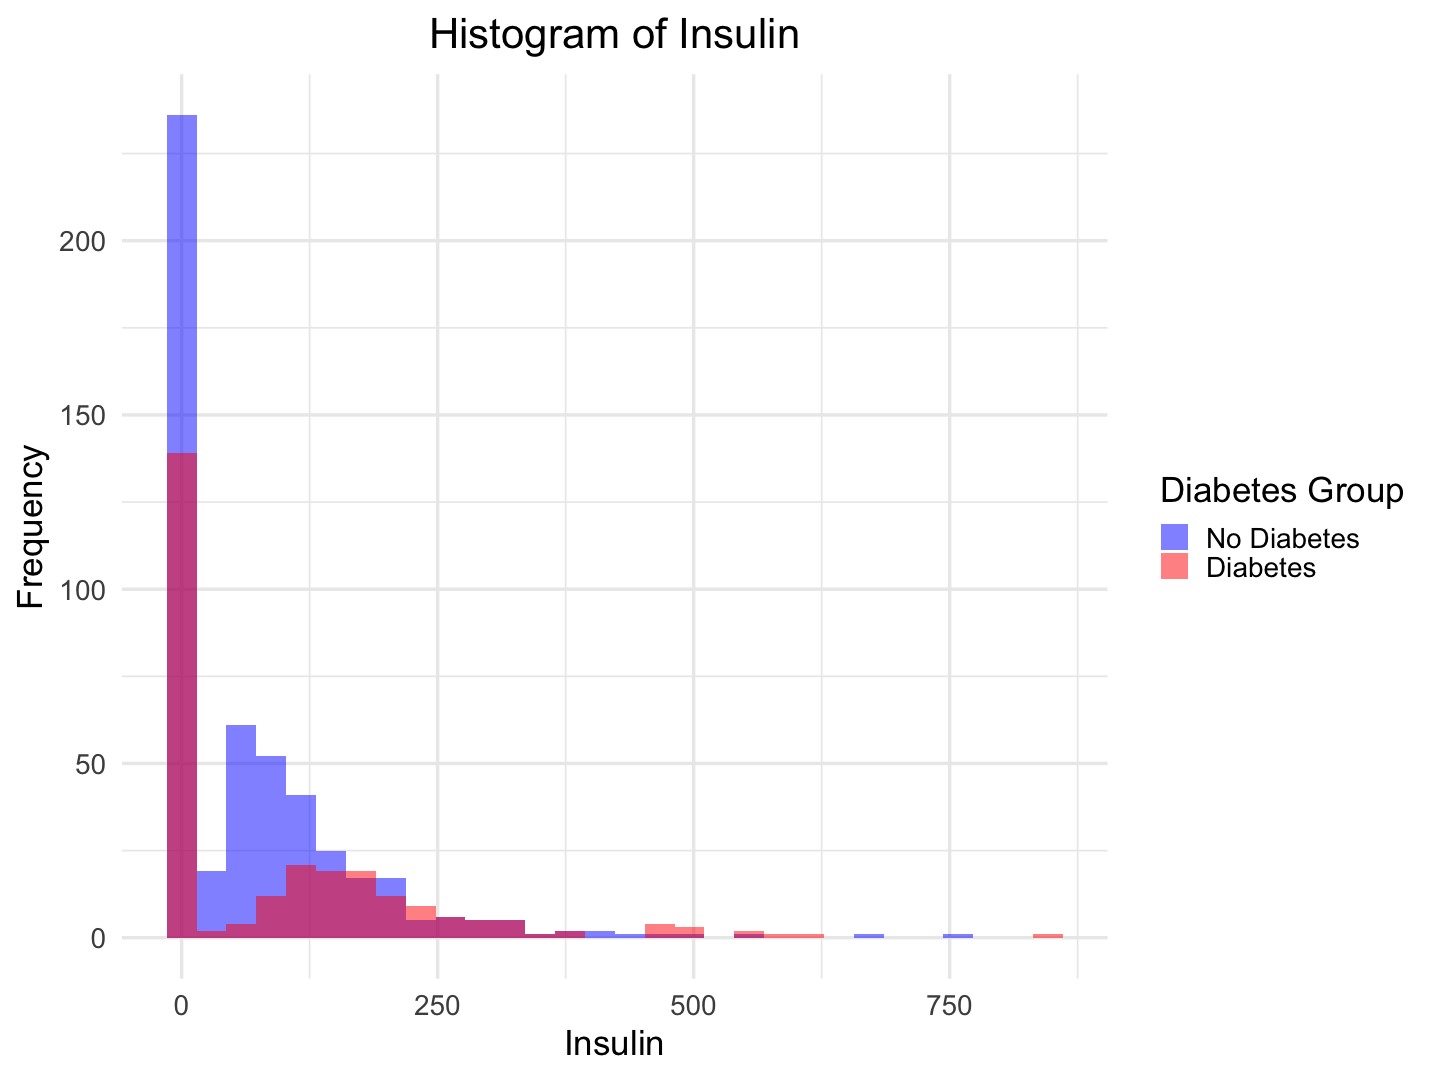

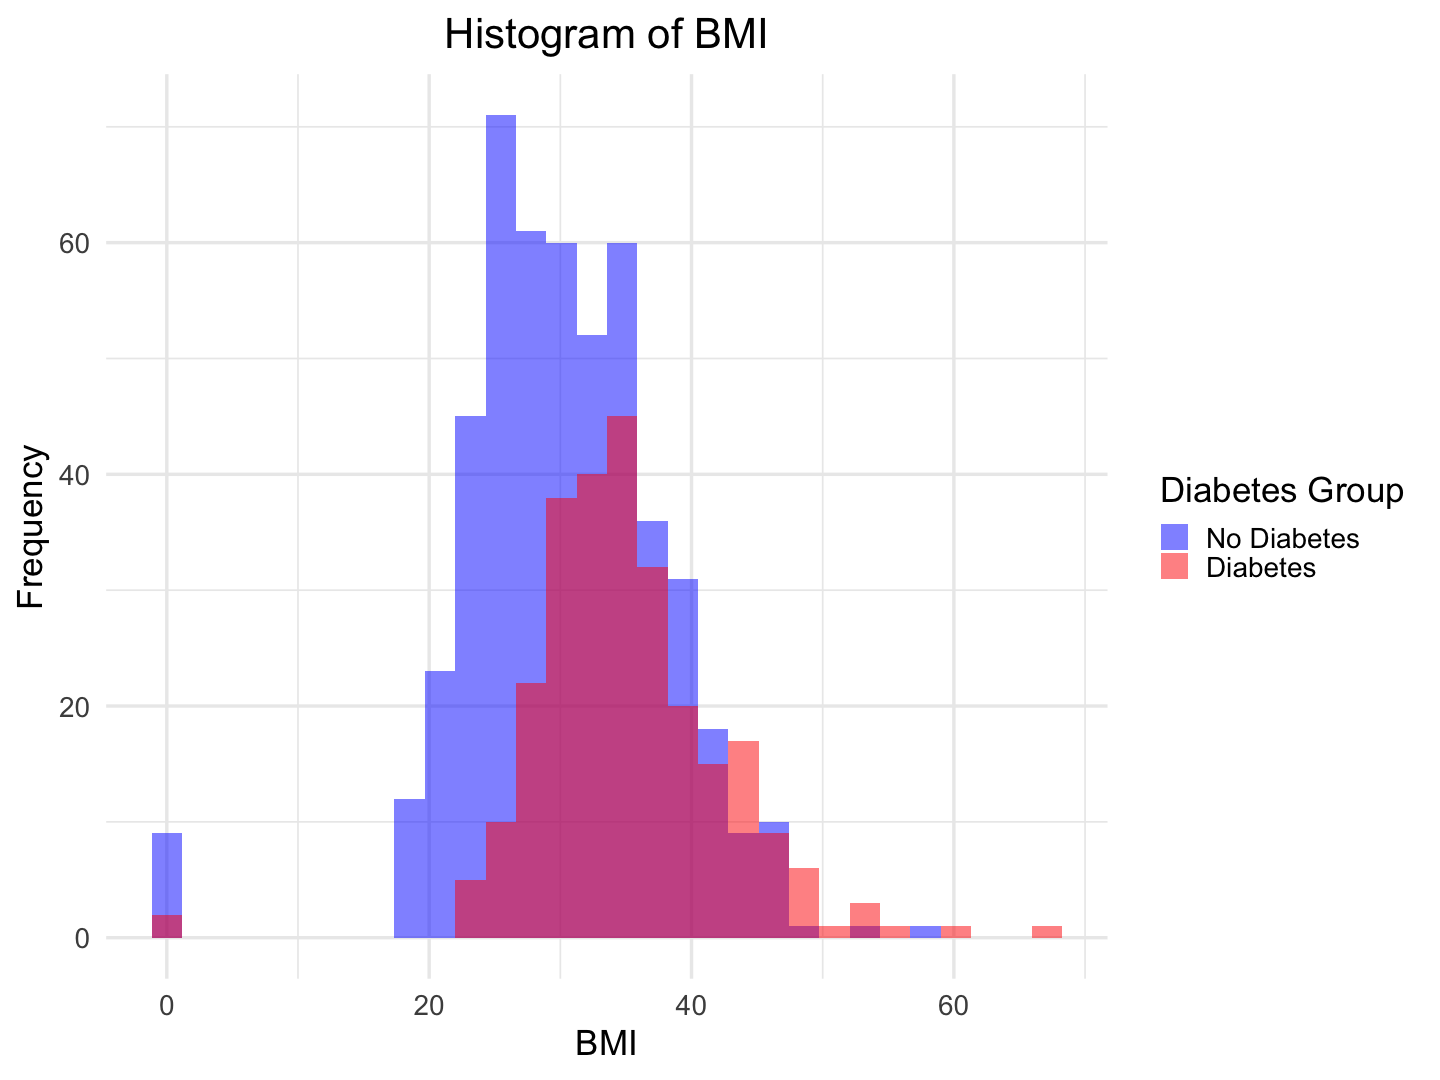

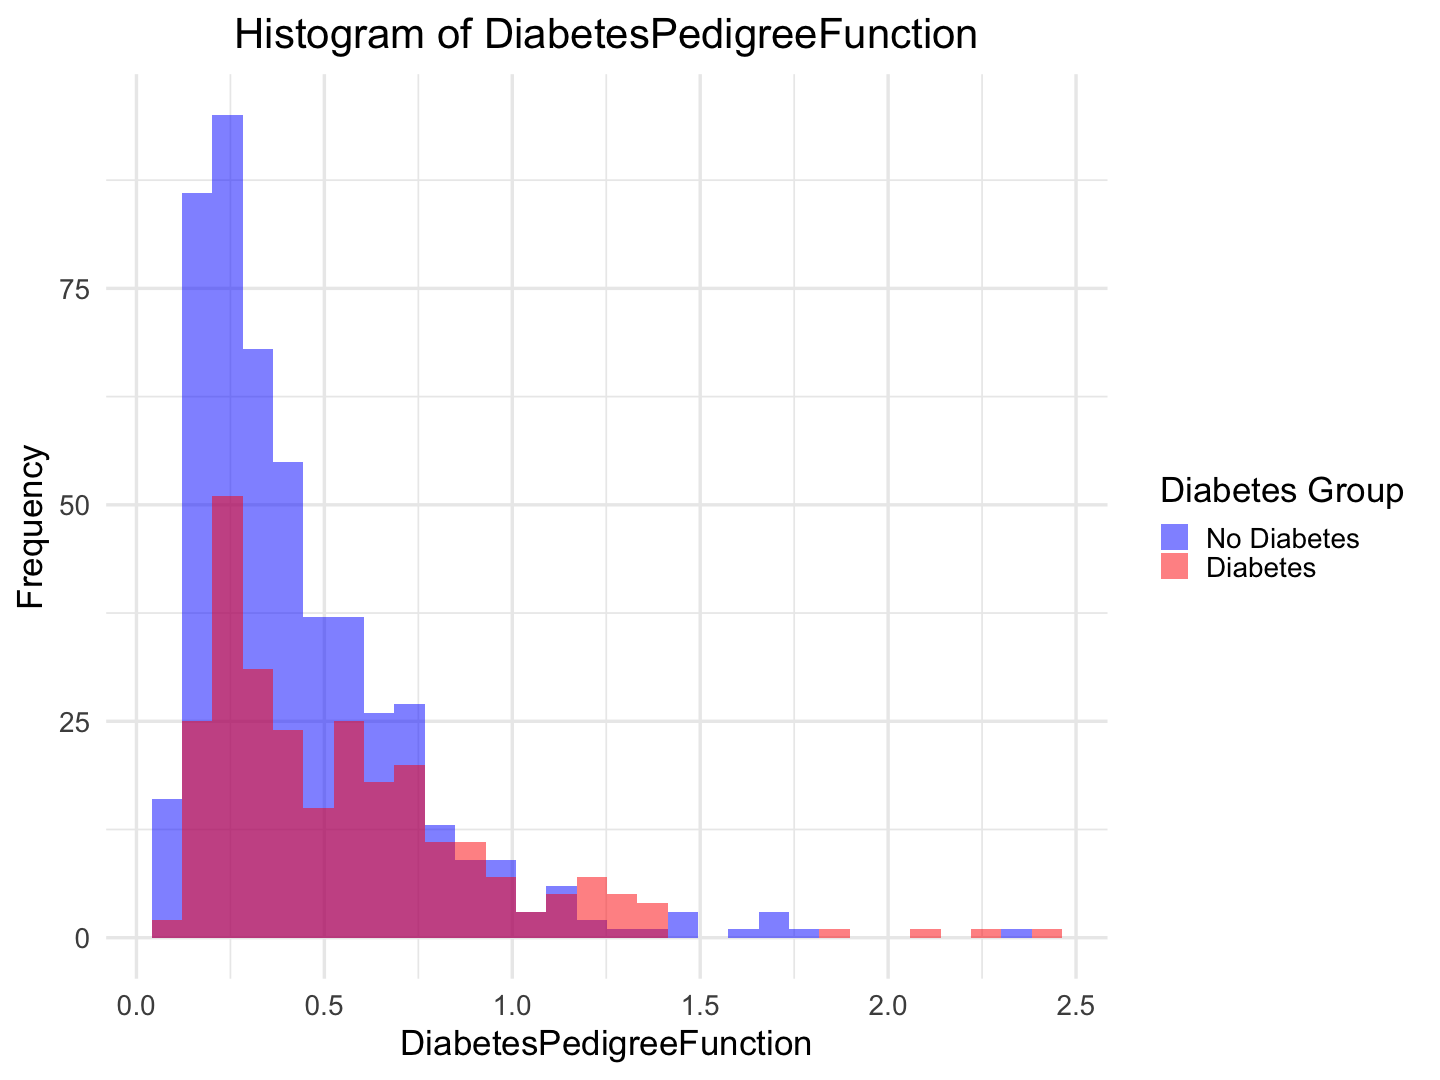

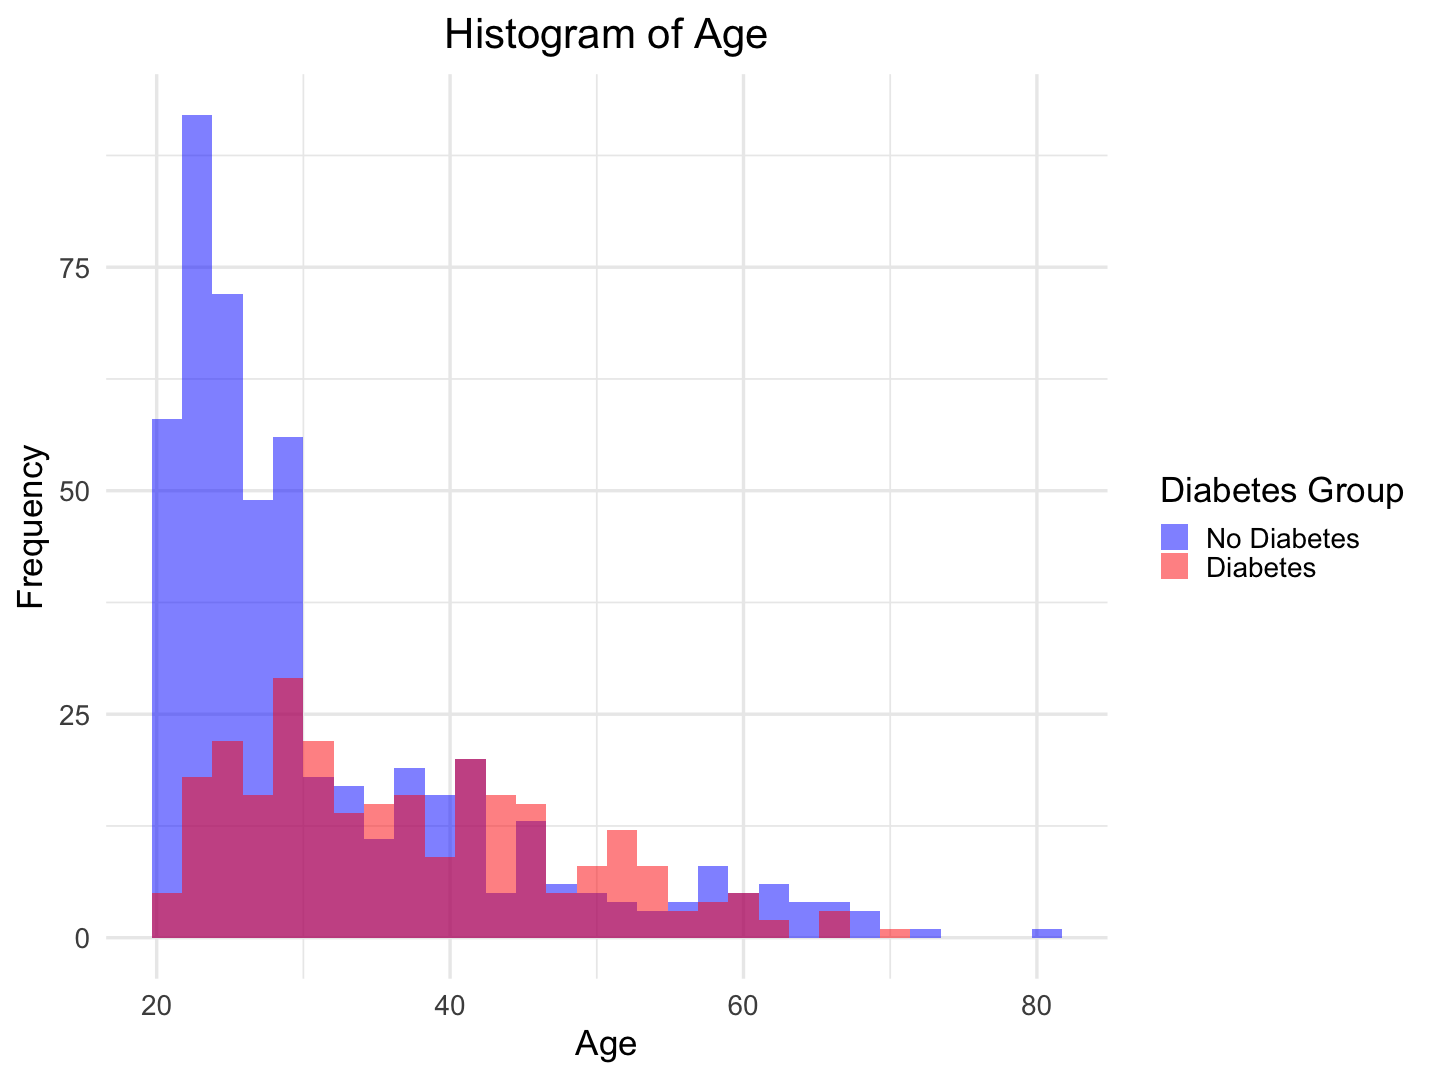

In [3]:
options(repr.plot.width = 12, repr.plot.height = 9)

numeric_cols <- c("Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age")

for (feat in numeric_cols) {
  feat_plot <- ggplot(diabetes_data) + 
    geom_histogram(aes(x = get(feat), fill = as.factor(Outcome)), bins = 30, alpha = 0.5, position = "identity") +
    labs(title = paste("Histogram of", feat), x = feat, y = "Frequency") +
    scale_fill_manual(values = c("blue", "red"), labels = c("No Diabetes", "Diabetes")) +
    guides(fill = guide_legend(title = "Diabetes Group")) +
    theme_minimal(base_size = 21) + 
    theme(plot.title = element_text(hjust = 0.5))
  
  print(feat_plot)
}

### Preliminary Observations from Histograms

- **Pregnancies**: The distribution is right-skewed, with most values clustered around lower numbers. Patients with diabetes tend to have a higher number of pregnancies compared to those without diabetes.

- **Glucose**: There is a noticeable difference between the glucose levels of diabetic and non-diabetic patients. Diabetic patients generally have higher glucose levels, creating a clearer separation in the histogram.

- **Blood Pressure**: Both groups have similar distributions with a slight trend towards higher blood pressure in diabetic patients.

- **Skin Thickness**: Diabetic patients tend to have thicker skin measurements than non-diabetic patients.

- **Insulin**: Diabetic patients generally show a wider range of insulin values, with a tendency towards higher levels.

- **BMI**: Both groups show a right-skewed distribution, but diabetic patients tend to have higher BMI values on average compared to non-diabetic patients.

- **Diabetes Pedigree Function**: The distribution is right-skewed, with diabetic patients showing a slightly higher pedigree function, indicating a higher likelihood of diabetes based on family history.

- **Age**: The distribution is right-skewed, with a higher proportion of younger individuals. Diabetic patients tend to be older on average than non-diabetic patients.


In [4]:
diabetes_data <- diabetes_data %>%
  mutate(across(c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"), ~ na_if(., 0)))

In [5]:
imputed_data <- complete(mice(diabetes_data, method = 'pmm', seed = 123), 1)
diabetes_imputed <- diabetes_data |>
    mutate(Glucose = imputed_data$Glucose,
           BloodPressure = imputed_data$BloodPressure,
           SkinThickness = imputed_data$SkinThickness,
           Insulin = imputed_data$Insulin,
           BMI = imputed_data$BMI)


 iter imp variable
  1   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  4   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  4 

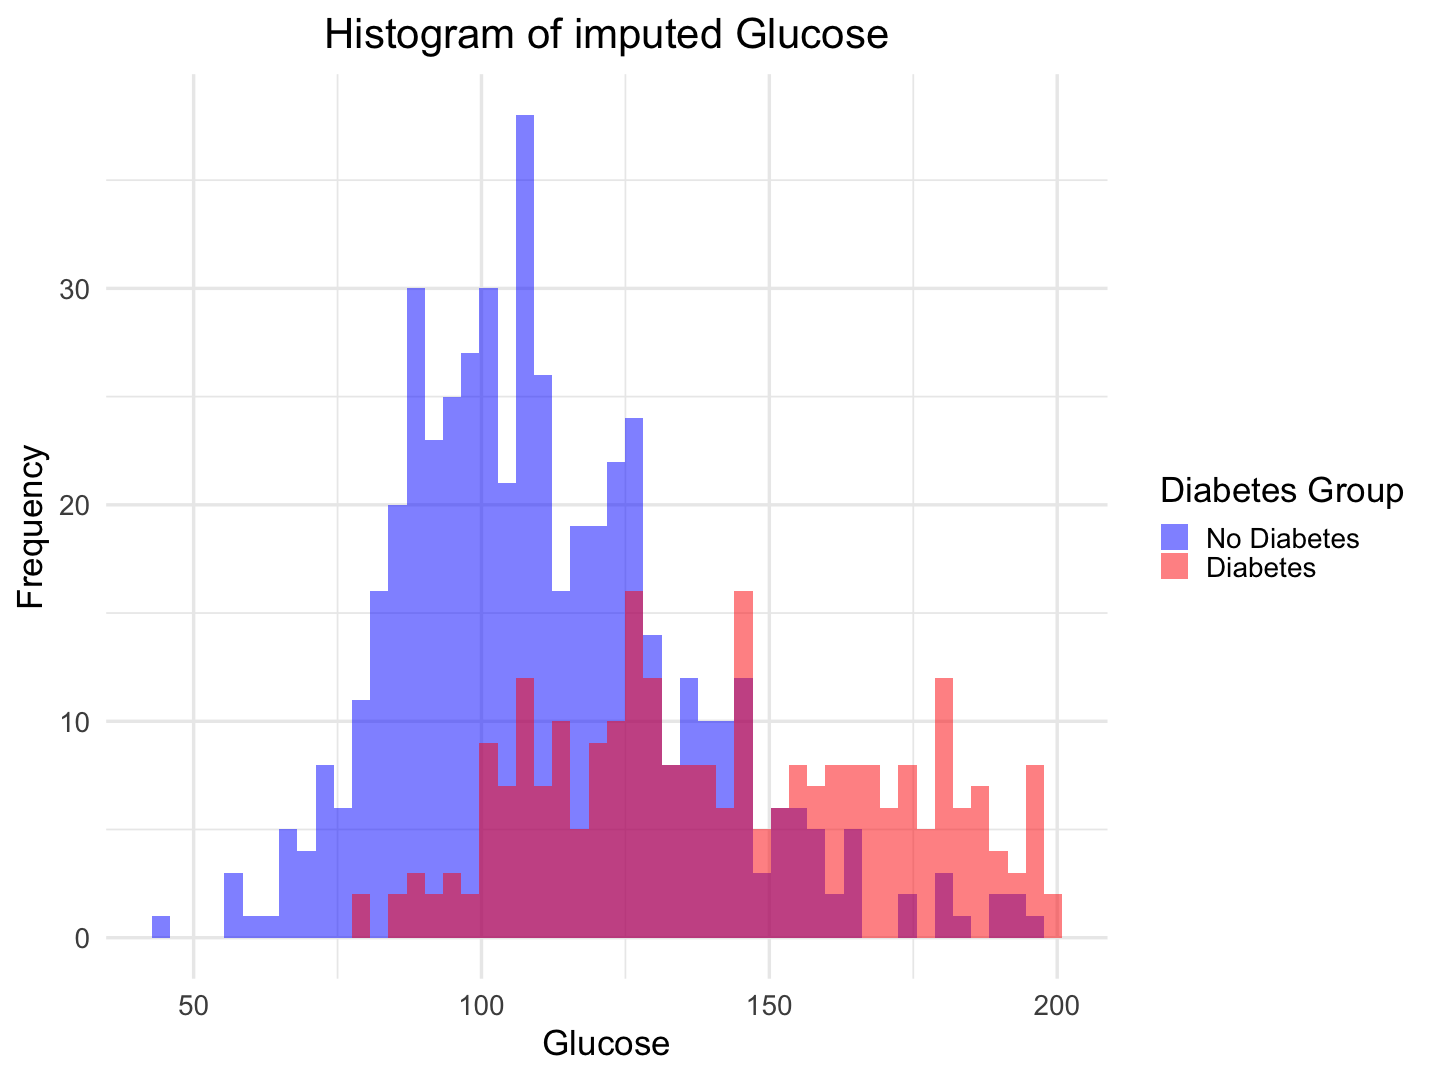

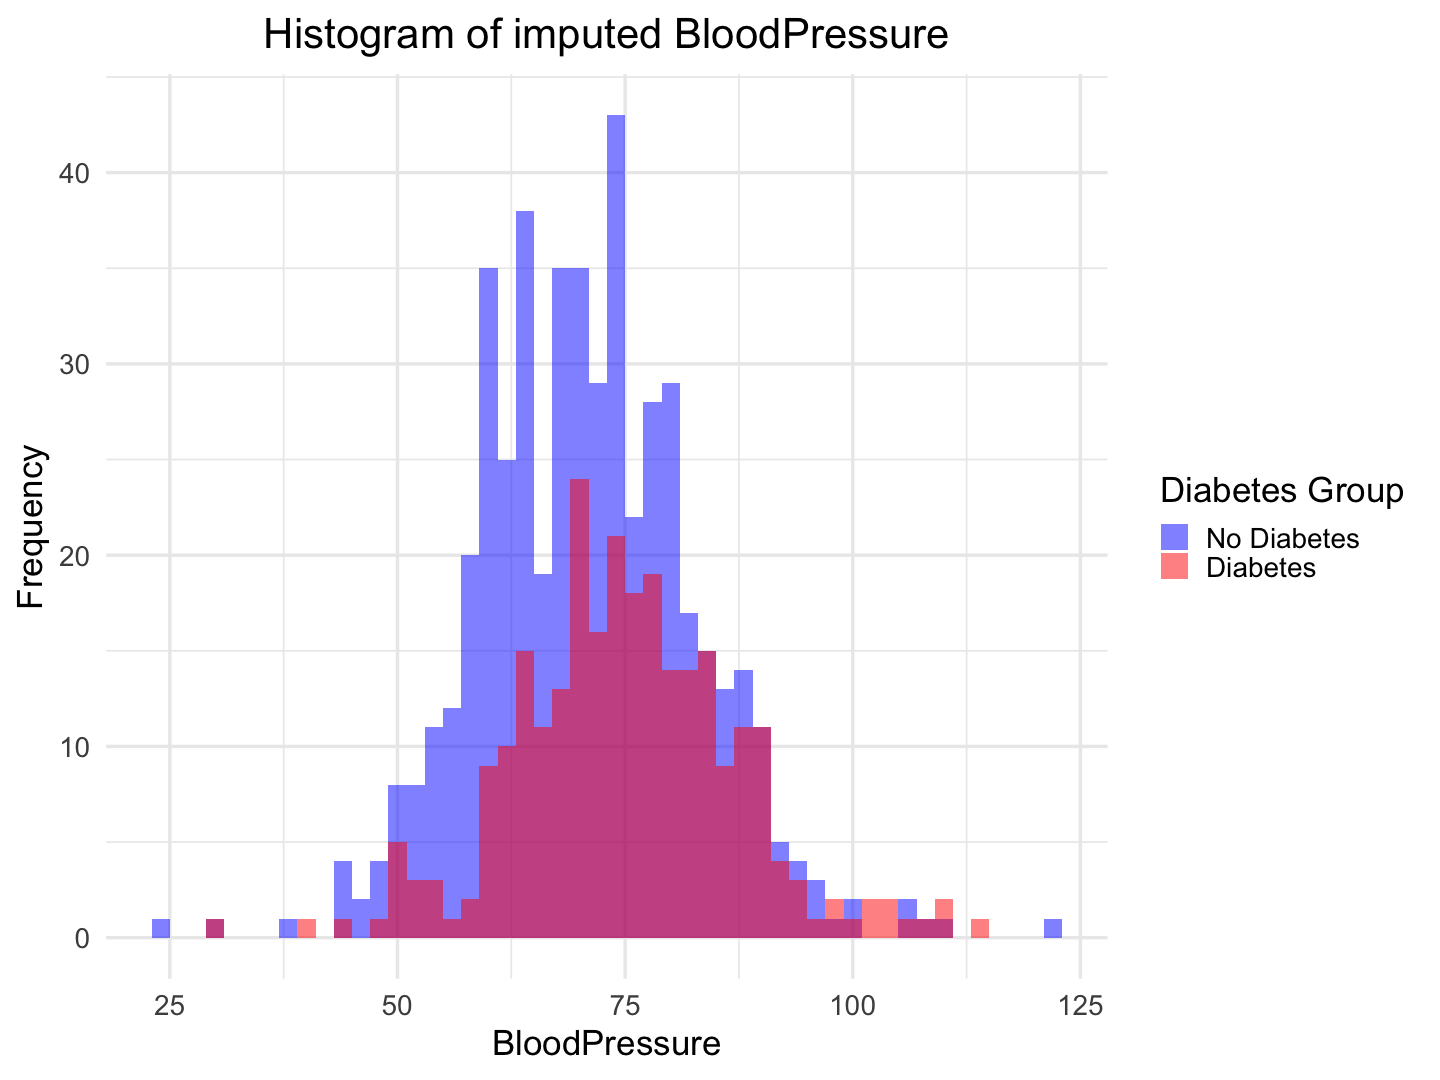

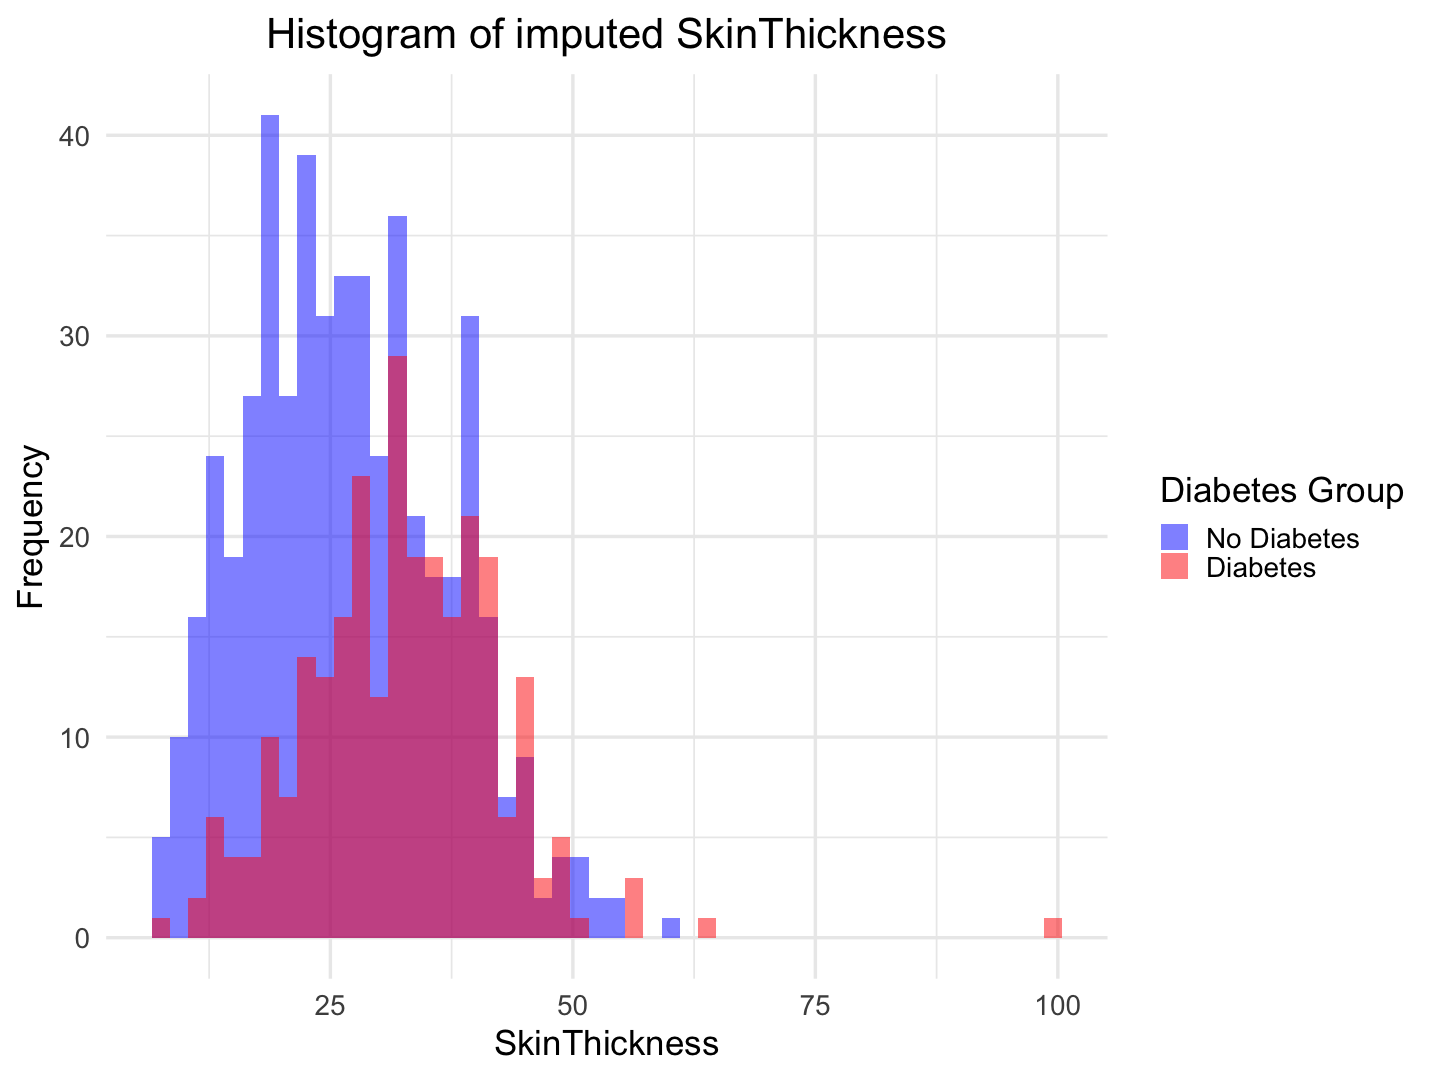

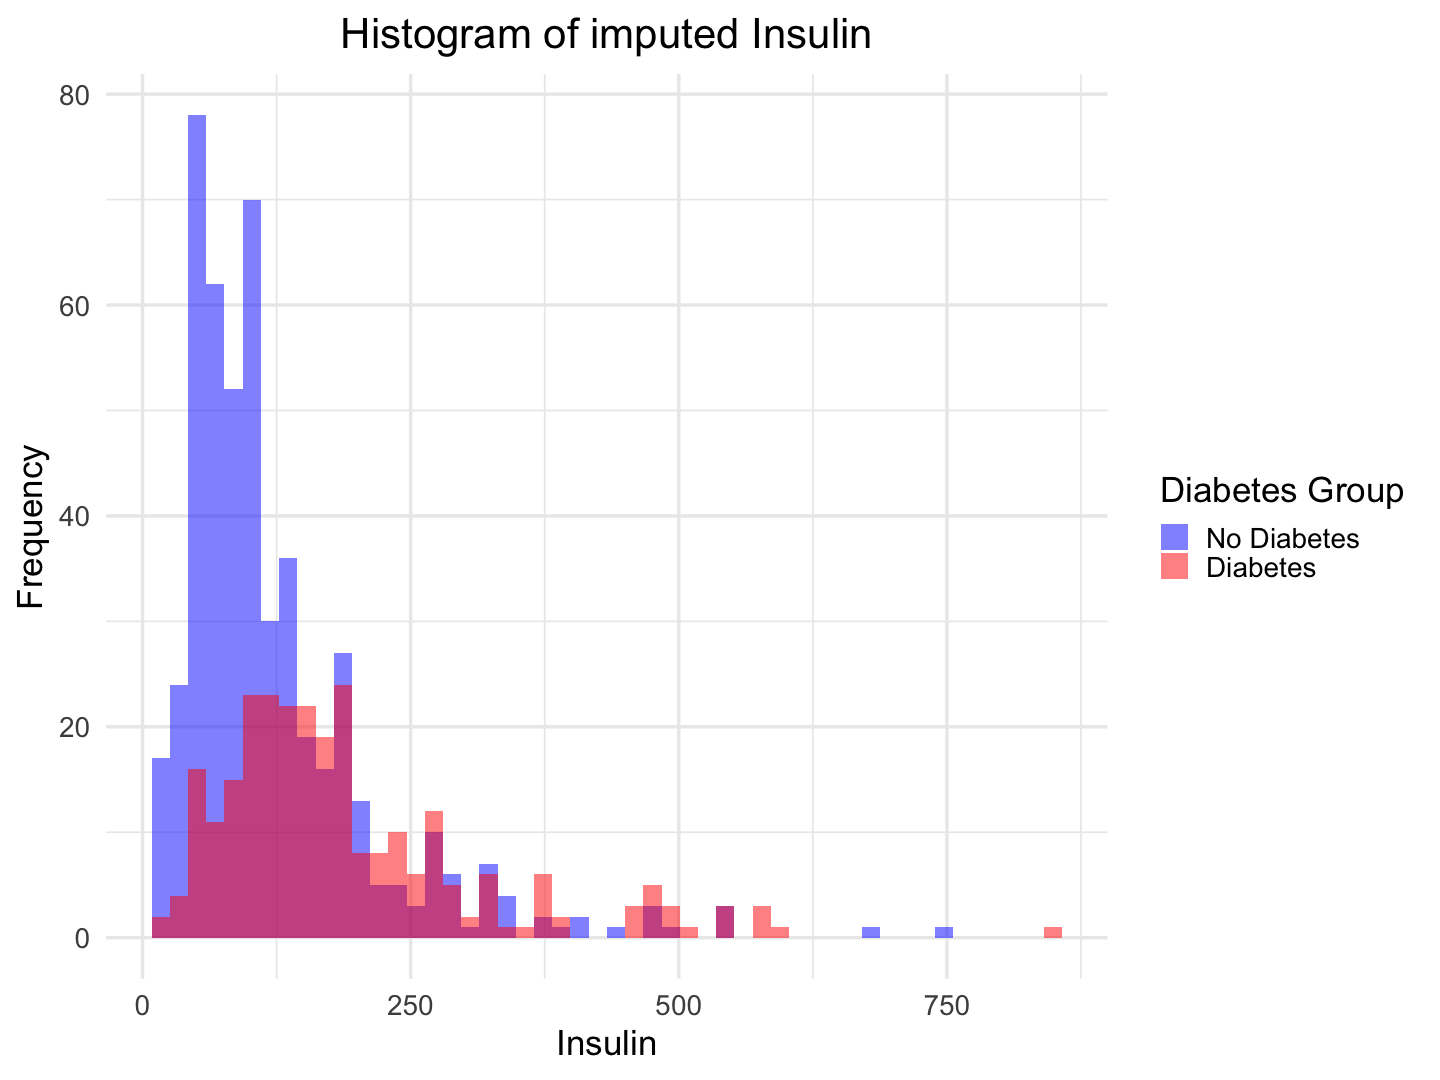

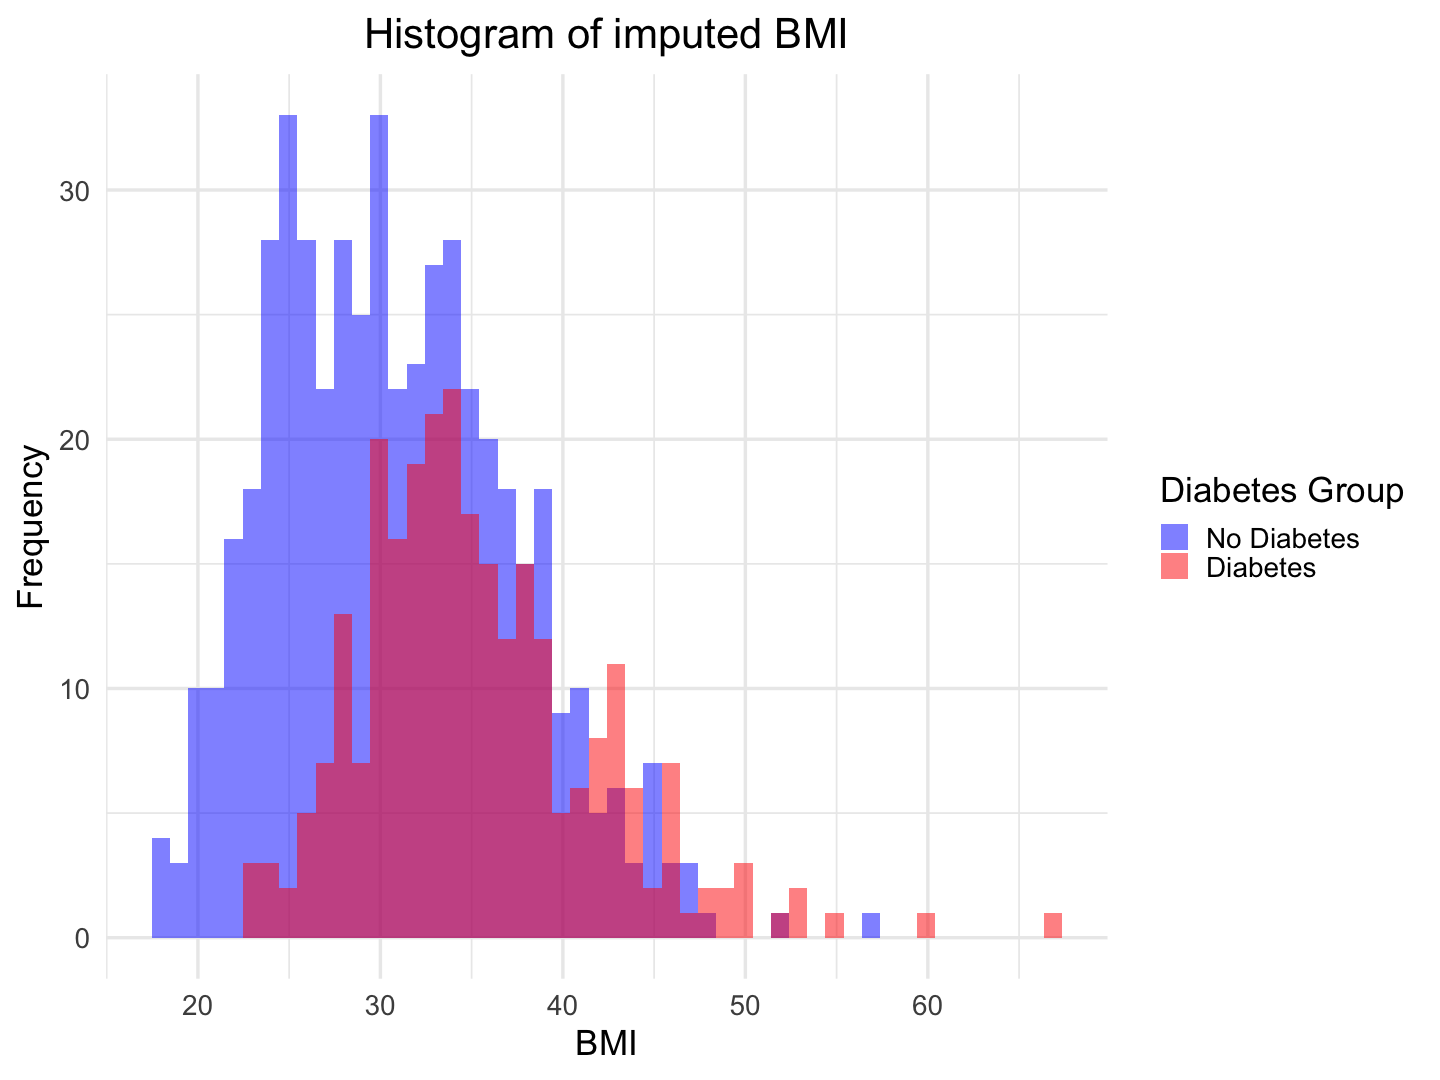

In [6]:
options(repr.plot.width = 12, repr.plot.height = 9)

imputed_numeric_cols <- c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI")

for (feat in imputed_numeric_cols) {
  feat_plot <- ggplot(diabetes_imputed) + 
    geom_histogram(aes(x = get(feat), fill = as.factor(Outcome)), bins = 50, alpha = 0.5, position = "identity") +
    labs(title = paste("Histogram of imputed", feat), x = feat, y = "Frequency") +
    scale_fill_manual(values = c("blue", "red"), labels = c("No Diabetes", "Diabetes")) +
    guides(fill = guide_legend(title = "Diabetes Group")) +
    theme_minimal(base_size = 21) + 
    theme(plot.title = element_text(hjust = 0.5))
  
  print(feat_plot)
}

In [7]:
diabetes_imputed_scaled <- as.data.frame(scale(diabetes_imputed[ , !names(diabetes_imputed) %in% "Outcome"]))
diabetes_imputed_scaled <- diabetes_imputed_scaled |>
    mutate(Outcome = diabetes_imputed$Outcome)
head(diabetes_imputed_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.6395305,0.8622811,-0.02466284,0.59961545,0.7520436,0.1720251,0.4681869,1.42506672,1
2,-0.8443348,-1.1967757,-0.51033103,0.02506191,-0.9773665,-0.8402418,-0.3648230,-0.19054773,0
3,1.2330766,2.0062015,-0.67222042,-1.50708089,-0.1928918,-1.3174534,0.6040037,-0.10551539,1
4,-0.8443348,-1.0660419,-0.51033103,-0.54949164,-0.4692409,-0.6233275,-0.9201630,-1.04087112,0
5,-1.1411079,0.5027632,-2.61489318,0.59961545,0.1904311,1.5458160,5.4813370,-0.02048305,1
6,0.3427574,-0.1835890,0.13722656,0.50385653,-0.6029582,-0.9848514,-0.8175458,-0.27558007,0
